In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('../dataset/data.csv')
df.iloc[:,-20:]

,Vehicle_0.9,Vehicle_0.7,Vehicle_0.5,Vehicle_0.3,Vehicle_0.1,Bus_0.9,Bus_0.7,Bus_0.5,Bus_0.3,Bus_0.1,Motorcycle_0.9,Motorcycle_0.7,Motorcycle_0.5,Motorcycle_0.3,Motorcycle_0.1,Ambulance_0.9,Ambulance_0.7,Ambulance_0.5,Ambulance_0.3,Ambulance_0.1
0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
!pip install opencv-python-headless
!pip install matplotlib
!pip install requests
!pip install streamlink

     |████████████████████████████████| 329 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 6.9 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 75.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41 kB 1.6 MB/s  eta 0:00:01
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=793c5ce4ea4a393b6a5cc3de2645856d2b6a1bcf5ec79ab41bc86032ea2b6322
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [ ]:
long = -73.985130
lat = 40.758896
weather_api_key = ''#api key for the weather api
traffic_api_key = ''#api key for the traffic api 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os 

vidcap = cv2.VideoCapture('video.mp4')
success,image = vidcap.read()
plt.imsave('./frame0.jpg',image)
count = 1
while success:
    plt.imsave("frame%d.jpg" % count, image) # save frame as JPEG file      
    success,image = vidcap.read()
    count += 1

In [84]:
img=plt.imread('frame1.jpg')

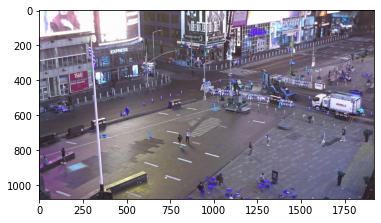

In [85]:
plt.imshow(img)
plt.show()

In [92]:
import requests

call = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={long}&appid={api_key}&units=metric"
response = requests.get(call)

In [93]:
response.json()

{'coord': {'lon': -73.9851, 'lat': 40.7589},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 10.85,
  'feels_like': 10.42,
  'temp_min': 9.23,
  'temp_max': 11.92,
  'pressure': 1014,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 300},
 'clouds': {'all': 75},
 'dt': 1647590694,
 'sys': {'type': 2,
  'id': 2003558,
  'country': 'US',
  'sunrise': 1647601361,
  'sunset': 1647644719},
 'timezone': -14400,
 'id': 5125771,
 'name': 'Manhattan',
 'cod': 200}

In [38]:
# R-CNN
import numpy as np
from PIL import Image

def preprocess(image):
    # Resize
    ratio = 800.0 / min(image.size[0], image.size[1])
    image = image.resize((int(ratio * image.size[0]), int(ratio * image.size[1])), Image.BILINEAR)

    # Convert to BGR
    image = np.array(image)[:, :, [2, 1, 0]].astype('float32')

    # HWC -> CHW
    image = np.transpose(image, [2, 0, 1])

    # Normalize
    mean_vec = np.array([102.9801, 115.9465, 122.7717])
    for i in range(image.shape[0]):
        image[i, :, :] = image[i, :, :] - mean_vec[i]

    # Pad to be divisible of 32
    import math
    padded_h = int(math.ceil(image.shape[1] / 32) * 32)
    padded_w = int(math.ceil(image.shape[2] / 32) * 32)

    padded_image = np.zeros((3, padded_h, padded_w), dtype=np.float32)
    padded_image[:, :image.shape[1], :image.shape[2]] = image
    image = padded_image

    return image

img = Image.open('frame1950.jpg')
img_data = preprocess(img)

In [59]:
!streamlink -f --hls-live-edge 99999 --hls-segment-threads 1 -o "video.mp4" https://www.youtube.com/watch?v=AdUw5RdyZxI best

[cli][info] Found matching plugin youtube for URL https://www.youtube.com/watch?v=AdUw5RdyZxI
[cli][info] Available streams: 144p (worst), 240p, 360p, 480p, 720p, 1080p (best)
[cli][info] Opening stream: 1080p (hls)
[cli][info] Writing output to
/home/studio-lab-user/sagemaker-studiolab-notebooks/video.mp4
[download][video.mp4] Written 21.0 MB (55s @ 278.2 KB/s)                        ^C
[cli][info] Stream ended
Interrupted! Exiting...
[cli][info] Closing currently open stream...
